In [232]:
import json


data_dir= r'C:\Users\User\Desktop\SCOOL\SCOOL\semester_2\advenced_mechine_learning\פרוייקט גמר\perspectrum\data\dataset'

file = data_dir + "\perspective_pool_v1.0.json"

perspective_df = pd.io.json.read_json(file)
perspective_df.head()

,pId,text,source
0,1,Being a performer limits a child’s formal educ...,idebate
1,2,performers are at risk of exploitation,idebate
2,3,It is unethical to expose children to the pres...,idebate
3,4,Being a performer can make the child physicall...,idebate
4,5,Allowing children to perform pushes them to gr...,idebate


In [233]:

df.source.describe()

count        8092
unique          3
top       idebate
freq         4133
Name: source, dtype: object

In [234]:
df.source.unique()

array(['idebate', 'procon', 'debatewise'], dtype=object)

In [235]:
df.source.value_counts()

idebate       4133
debatewise    3013
procon         946
Name: source, dtype: int64

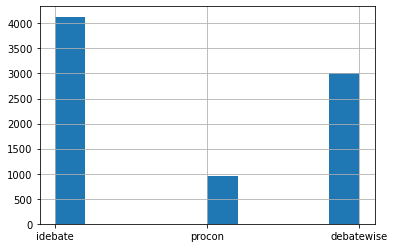

In [236]:
df.source.hist()

In [275]:
import json

file = data_dir + "\evidence_pool_v1.0.json"

df = pd.io.json.read_json(file)
df.head()

,eId,text,source
0,1,Spending so much time either performing or tra...,idebate
1,2,Children are generally considered to be too yo...,idebate
2,3,Even experienced adults can find it difficult ...,idebate
3,4,Children involved at a professional level in s...,idebate
4,5,Child performers are exposed to a much higher ...,idebate


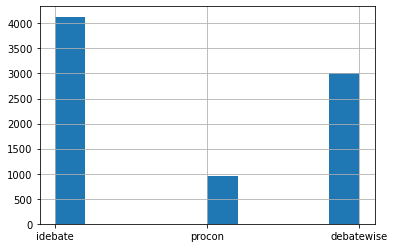

In [276]:
df.source.hist()

In [258]:
file = data_dir + "\dataset_split_v1.0.json"

f = open(file,)


split_df = pd.DataFrame.from_dict(dict(json.load(f)), orient='index', columns=['split'])

In [259]:
print(split_df.count())

split    907
dtype: int64


In [260]:
import json

file = data_dir + "\perspectrum_with_answers_v1.0.json"

perspectrum_df = pd.io.json.read_json(file)
perspectrum_df.head()


,cId,text,source,perspectives,topics
0,499,Vaccination must be made compulsory,idebate,"[{'pids': [3695, 24076, 24077], 'stance_label_...",[health_and_medicine]
1,167,Male infant circumcision is tantamount to chil...,idebate,"[{'pids': [1242, 21983, 21984], 'stance_label_...","[culture, health_and_medicine, gender]"
2,943,School Day Should Be Extended,debatewise,"[{'pids': [7579], 'stance_label_3': 'SUPPORT',...",[]
3,944,punishment should fit the criminal,debatewise,"[{'pids': [7584, 26958, 26959], 'stance_label_...",[law]
4,621,A government has the obligation to lessen the ...,debatewise,"[{'pids': [5143], 'stance_label_3': 'SUPPORT',...","[politics, economy, society]"


In [261]:
print(perspectrum_df.count())

cId             907
text            907
source          907
perspectives    907
topics          907
dtype: int64


In [262]:
perspectrum_df

,cId,text,source,perspectives,topics
0,499,Vaccination must be made compulsory,idebate,"[{'pids': [3695, 24076, 24077], 'stance_label_...",[health_and_medicine]
1,167,Male infant circumcision is tantamount to chil...,idebate,"[{'pids': [1242, 21983, 21984], 'stance_label_...","[culture, health_and_medicine, gender]"
2,943,School Day Should Be Extended,debatewise,"[{'pids': [7579], 'stance_label_3': 'SUPPORT',...",[]
3,944,punishment should fit the criminal,debatewise,"[{'pids': [7584, 26958, 26959], 'stance_label_...",[law]
4,621,A government has the obligation to lessen the ...,debatewise,"[{'pids': [5143], 'stance_label_3': 'SUPPORT',...","[politics, economy, society]"
...,...,...,...,...,...
902,697,Illegal downloaders should be cut off from the...,debatewise,"[{'pids': [5788, 25967], 'stance_label_3': 'SU...",[]
903,10,It is important to use a graduated response to...,idebate,"[{'pids': [77, 20917, 20918], 'stance_label_3'...","[science_and_technology, law]"
904,569,The D.A.R.E. program is good for America's kid...,procon,"[{'pids': [4313, 24704], 'stance_label_3': 'SU...",[education]
905,11,Internet access is a human right,idebate,"[{'pids': [87, 20933, 20934], 'stance_label_3'...","[digital_freedom, human_rights]"


In [263]:
tuples_list = list()
errors = 0
for index, row in perspectrum_df.iterrows():
    
    #print(row['perspectives'])
    cId = row['cId']
    
    try:
        split = split_df.iloc[cId]['split']
    except Exception as e:
        split = 'train'
        errors += 1
    for perspective_group in row['perspectives']:
        
        label = perspective_group['stance_label_3']
        for perspective in perspective_group['pids']:
            tuples_list.append((row['text'], perspective_df[perspective_df['pId'] == perspective].iloc[0]['text'],label, split))

clean_df = pd.DataFrame.from_records(tuples_list, columns =['text', 'perspective', 'label', 'split'])
clean_df.head()


,text,perspective,label,split
0,Vaccination must be made compulsory,It is the state’s duty to protect its community,SUPPORT,train
1,Vaccination must be made compulsory,The state must keep it's community safe.,SUPPORT,train
2,Vaccination must be made compulsory,The safety of the community is the state's pri...,SUPPORT,train
3,Vaccination must be made compulsory,Compulsory vaccination violates the individual...,UNDERMINE,train
4,Vaccination must be made compulsory,Individuals have the right to refuse vaccinati...,UNDERMINE,train


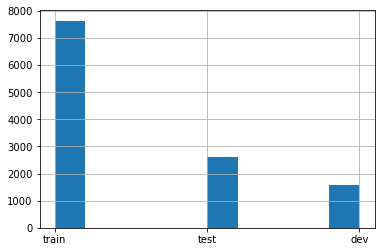

In [264]:
clean_df.split.hist()

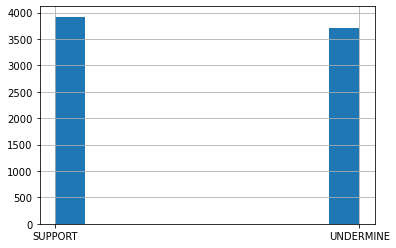

In [265]:
train_data = clean_df[clean_df['split'] == 'train'][['text', 'perspective', 'label']]
train_data.label.hist()

In [267]:
train_data.head()

,text,perspective,label
0,Vaccination must be made compulsory,It is the state’s duty to protect its community,SUPPORT
1,Vaccination must be made compulsory,The state must keep it's community safe.,SUPPORT
2,Vaccination must be made compulsory,The safety of the community is the state's pri...,SUPPORT
3,Vaccination must be made compulsory,Compulsory vaccination violates the individual...,UNDERMINE
4,Vaccination must be made compulsory,Individuals have the right to refuse vaccinati...,UNDERMINE


In [268]:
test_data = clean_df[clean_df['split'] == 'test'][['text', 'perspective', 'label']]
test_data.head()

,text,perspective,label
16,Male infant circumcision is tantamount to chil...,Parents have the right to use their best judgm...,UNDERMINE
17,Male infant circumcision is tantamount to chil...,Parents know what best for thier child,UNDERMINE
18,Male infant circumcision is tantamount to chil...,Parents have the right to make the decisions f...,UNDERMINE
44,All patents should be removed on anti-retrovir...,Patents on ARVs prevent drug companies from co...,SUPPORT
168,The prevalence of ‘African mercenaries’ is dec...,Decreased Conflict and the end of the mercenar...,SUPPORT


In [269]:
train_data.to_csv('cstance_train.csv', sep=',')

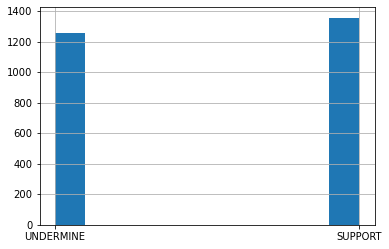

In [270]:
test_data.label.hist()

In [271]:
test_data.to_csv('cstance_test.csv', sep=',')

In [272]:
dev_data = clean_df[clean_df['split'] == 'dev'][['text', 'perspective', 'label']]
dev_data.head()

,text,perspective,label
30,A government has the obligation to lessen the ...,True individual freedom cannot exist without e...,SUPPORT
31,A government has the obligation to lessen the ...,The wealth gap does not allow for equality bet...,SUPPORT
32,A government has the obligation to lessen the ...,Society gives an unfair advantage to certain g...,SUPPORT
33,A government has the obligation to lessen the ...,Wealth gap undermines equality of opportunity;...,SUPPORT
34,A government has the obligation to lessen the ...,The Rich Poor Gap Silences the Political Voice...,SUPPORT


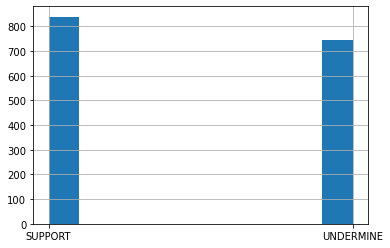

In [255]:
dev_data['label'].hist()

In [273]:
dev_data.to_csv('cstance_dev.csv', sep=',')